In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [389]:
df = pd.read_csv('credit_risk_dataset.csv')

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [390]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [391]:
df.shape

(32581, 12)

In [392]:
df.dropna(inplace = True)

In [393]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [394]:
df.shape

(28638, 12)

In [395]:
k = df.select_dtypes(include = 'number')

In [396]:
k.drop(['loan_status'],axis=1,inplace = True)

C:\Users\kusumitha\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [397]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

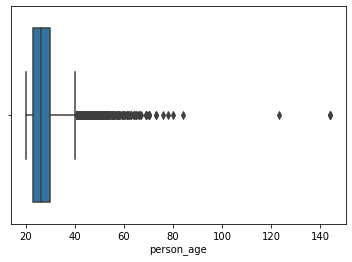

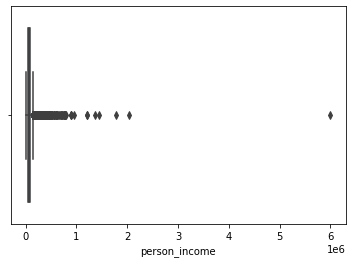

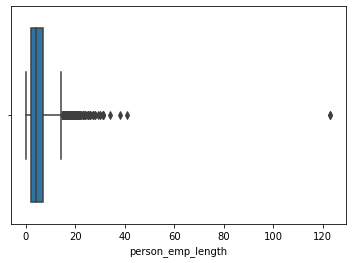

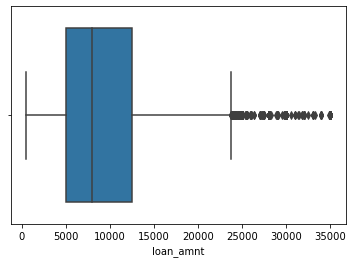

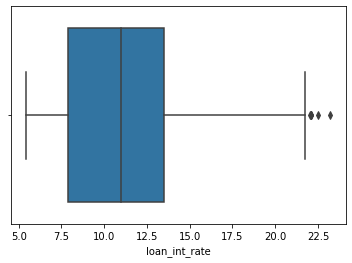

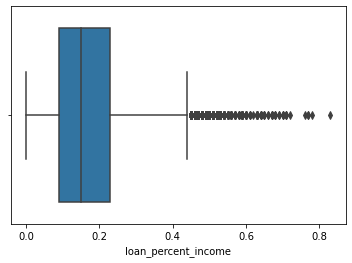

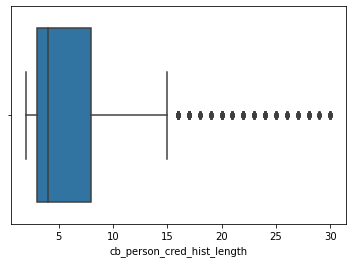

In [398]:
for col in k.columns.tolist():
    sns.boxplot(k[col])
    plt.show()

In [399]:
df.loan_status.value_counts()

0    22435
1     6203
Name: loan_status, dtype: int64

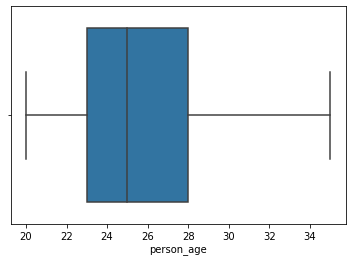

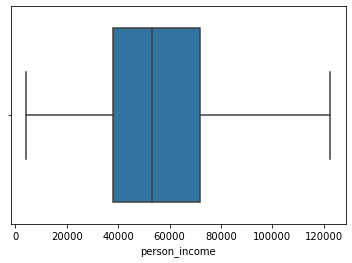

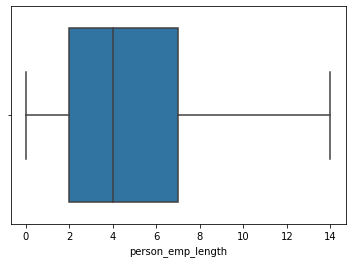

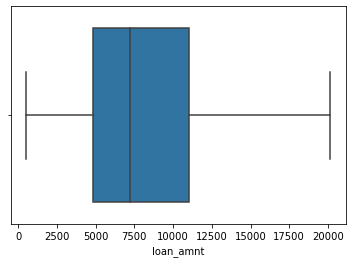

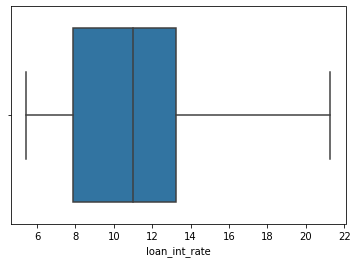

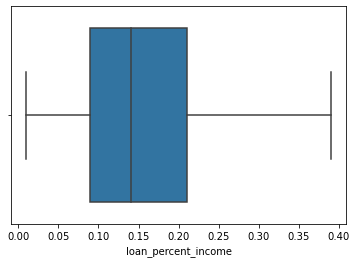

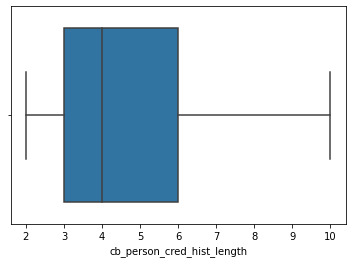

In [402]:
def out(col):
 q1 = df[col].quantile(0.25)
 q3 = df[col].quantile(0.75)
 IQR = q3-q1
 lb = q1-(1.5*IQR)

 ub = q3+(1.5*IQR)

 outliers = df[(df[col]<lb)|(df[col]>ub)].index
 return outliers
for i in k:
 df.drop(out(i),inplace=True)
 sns.boxplot(df[i])
 plt.show()

In [403]:
df.shape

(21577, 12)

In [404]:
y = df['loan_status']
X = df[['person_age'
,'person_income',
'person_home_ownership',
'person_emp_length',
'loan_intent',
'loan_grade',
'loan_amnt',
'loan_int_rate',
'loan_percent_income',
'cb_person_default_on_file',
'cb_person_cred_hist_length']]

In [405]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16182, 11) (16182,)
(5395, 11) (5395,)


In [406]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10687,RENT,VENTURE,B,N
19007,MORTGAGE,EDUCATION,A,N
14765,OWN,VENTURE,B,N
2845,RENT,DEBTCONSOLIDATION,A,N
23409,MORTGAGE,MEDICAL,C,Y


In [407]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10687,22,38004,6.0,10000,10.74,0.26,3
19007,30,30000,3.0,5100,7.90,0.17,8
14765,24,27168,5.0,7500,9.99,0.28,2
2845,23,60000,1.0,3000,7.51,0.05,2
23409,32,62217,2.0,6000,14.27,0.10,6


In [408]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
10687,-1.083252,-0.764459,0.501069,0.403843,-0.052027,1.206273,-0.658598
19007,1.160017,-1.094064,-0.397358,-0.658692,-0.949911,0.154837,1.355811
14765,-0.522435,-1.210686,0.201594,-0.138267,-0.289145,1.439926,-1.061480
2845,-0.802844,0.141337,-0.996309,-1.114065,-1.073212,-1.247078,-1.061480
23409,1.720835,0.232634,-0.696833,-0.463533,1.064004,-0.662947,0.550047


In [409]:
X_train_cat1 = X_train_cat.drop(['loan_grade'],axis=1)

In [410]:
X_train_cat1

,person_home_ownership,loan_intent,cb_person_default_on_file
10687,RENT,VENTURE,N
19007,MORTGAGE,EDUCATION,N
14765,OWN,VENTURE,N
2845,RENT,DEBTCONSOLIDATION,N
23409,MORTGAGE,MEDICAL,Y
...,...,...,...
17094,MORTGAGE,HOMEIMPROVEMENT,N
25798,RENT,DEBTCONSOLIDATION,N
12346,OWN,VENTURE,N
13537,OWN,VENTURE,N


In [411]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

X_train_cat1_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat1), 
                               columns=encoder.get_feature_names(X_train_cat1.columns), 
                               index = X_train_cat1.index)

X_train_cat1_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
10687,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
19007,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14765,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2845,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23409,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [412]:
df.loan_grade.value_counts()

A    7391
B    6789
C    4397
D    2307
E     572
F      99
G      22
Name: loan_grade, dtype: int64

In [413]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
10687
19007
14765
2845
23409


In [414]:
loan_grade = {'G':7,'F':6,'E':5,'D':4,'C':3,'B':2,'A':1}

X_train_cat_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_grade[x])

X_train_cat_le.head()

,loan_grade
10687,2
19007,1
14765,2
2845,1
23409,3


In [415]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat1_ohe,X_train_cat_le], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
10687,-1.083252,-0.764459,0.501069,0.403843,-0.052027,1.206273,-0.658598,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
19007,1.160017,-1.094064,-0.397358,-0.658692,-0.949911,0.154837,1.355811,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
14765,-0.522435,-1.210686,0.201594,-0.138267,-0.289145,1.439926,-1.061480,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
2845,-0.802844,0.141337,-0.996309,-1.114065,-1.073212,-1.247078,-1.061480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
23409,1.720835,0.232634,-0.696833,-0.463533,1.064004,-0.662947,0.550047,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3


In [416]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1447,25,16800,4.0,1200,10.38,0.07,2
11657,23,75000,7.0,6000,10.99,0.08,3
2525,23,20800,0.0,3000,11.46,0.14,4
7785,25,37200,6.0,7000,7.14,0.19,4
16222,25,43200,3.0,3000,13.80,0.07,2


In [417]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
1447,-0.242026,-1.637640,-0.097882,-1.504384,-0.165844,-1.013425,-1.061480
11657,-0.802844,0.759038,0.800545,-0.463533,0.027012,-0.896599,-0.658598
2525,-0.802844,-1.472920,-1.295784,-1.114065,0.175605,-0.195642,-0.255716
7785,-0.242026,-0.797568,0.501069,-0.246689,-1.190190,0.388489,-0.255716
16222,-0.242026,-0.550487,-0.397358,-1.114065,0.915411,-1.013425,-1.061480


In [418]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1447,RENT,MEDICAL,B,N
11657,MORTGAGE,MEDICAL,B,N
2525,RENT,DEBTCONSOLIDATION,B,N
7785,RENT,VENTURE,A,N
16222,RENT,VENTURE,C,N


In [419]:
X_test_cat1 = X_test_cat.drop(['loan_grade'],axis=1)

In [420]:
X_test_cat1

,person_home_ownership,loan_intent,cb_person_default_on_file
1447,RENT,MEDICAL,N
11657,MORTGAGE,MEDICAL,N
2525,RENT,DEBTCONSOLIDATION,N
7785,RENT,VENTURE,N
16222,RENT,VENTURE,N
...,...,...,...
14454,MORTGAGE,MEDICAL,N
1366,MORTGAGE,HOMEIMPROVEMENT,N
21760,MORTGAGE,DEBTCONSOLIDATION,N
3381,MORTGAGE,VENTURE,N


In [421]:
X_test_cat1_ohe = pd.DataFrame(encoder.transform(X_test_cat1), 
                               columns=encoder.get_feature_names(X_test_cat1.columns), 
                               index = X_test_cat1.index)

X_test_cat1_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
1447,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11657,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2525,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7785,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
16222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [422]:
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)

X_test_cat_le.head()

""
1447
11657
2525
7785
16222


In [423]:
X_test_cat_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : loan_grade[x])
X_test_cat_le.head()

,loan_grade
1447,2
11657,2
2525,2
7785,1
16222,3


In [424]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat1_ohe,X_test_cat_le], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
1447,-0.242026,-1.637640,-0.097882,-1.504384,-0.165844,-1.013425,-1.061480,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
11657,-0.802844,0.759038,0.800545,-0.463533,0.027012,-0.896599,-0.658598,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2525,-0.802844,-1.472920,-1.295784,-1.114065,0.175605,-0.195642,-0.255716,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7785,-0.242026,-0.797568,0.501069,-0.246689,-1.190190,0.388489,-0.255716,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
16222,-0.242026,-0.550487,-0.397358,-1.114065,0.915411,-1.013425,-1.061480,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3


# Logistic Regression Model

In [425]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [426]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

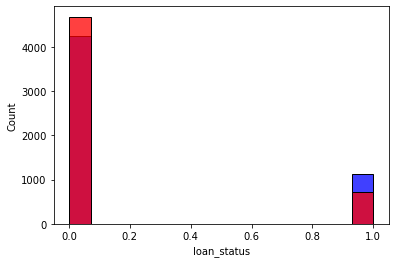

In [427]:
sns.histplot(y_test, color='blue')
sns.histplot(y_test_pred, color='red')

In [428]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8530120481927711

# Decision Tree Classifier

In [429]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [430]:
y_test_pred = classifier.predict(X_test_transformed)

<AxesSubplot:xlabel='loan_status', ylabel='Count'>

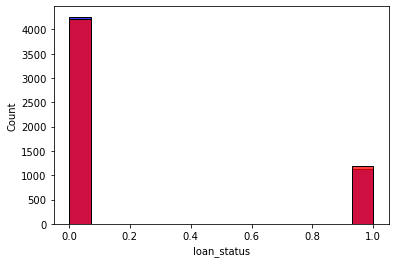

In [431]:
sns.histplot(y_test, color='blue')
sns.histplot(y_test_pred, color='red')

In [432]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_test_pred)

0.8800741427247452

# KNN Classification

In [433]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [434]:
y_test_pred = classifier.predict(X_test_transformed)

In [435]:
metrics.accuracy_score(y_test, y_test_pred)

0.885820203892493

# Support Vector Classifier

In [436]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [437]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.9028730305838739

# Naive Bayes Classifier

In [438]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_transformed, y_train)

GaussianNB()

In [439]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.8064874884151992

# Random Forest Classifier

In [440]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [441]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.9265987025023169

# Gradient Boosting Classifier

In [442]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [443]:
y_test_pred = classifier.predict(X_test_transformed)
metrics.accuracy_score(y_test, y_test_pred)

0.9217794253938832

In [ ]:
df1 = pd.DataFrame({'Random Forest Classifier':0.935864101230716:'93.5%','Gradient Boosting Classifier':0.9280637892182354:'92.8%',
                   'Support Vector Classifier':0.9100364014560582:'91%','KNN Classifier':0.8914889928930491:'89.1%','Decision Tree Classifier':
                   0.8843820419483446:'88.4%','Logistic Regression':0.8602877448431271:'86%','Naive Bayes Classifier':0.8167793378401803:'81'})

In [385]:
K = {"Model" : ['Random Forest Classifier','Gradient Boosting Classifier','Support Vector Classifier',
                'KNN Classifier','Decision Tree Classifier','Logistic Regression','Naive Bayes Classifier'],
    "Accuracy_score": [0.935864101230716,0.9280637892182354,0.9100364014560582,
                       0.8914889928930491,0.8843820419483446,0.8602877448431271,0.8167793378401803],
     "Percentage":['93.5%','92.8%','91%','89.1%','88.4%','86%','81']} 

In [386]:
K

{'Model': ['Random Forest Classifier',
  'Gradient Boosting Classifier',
  'Support Vector Classifier',
  'KNN Classifier',
  'Decision Tree Classifier',
  'Logistic Regression',
  'Naive Bayes Classifier'],
 'Accuracy_score': [0.935864101230716,
  0.9280637892182354,
  0.9100364014560582,
  0.8914889928930491,
  0.8843820419483446,
  0.8602877448431271,
  0.8167793378401803],
 'Percentage': ['93.5%', '92.8%', '91%', '89.1%', '88.4%', '86%', '81']}

In [387]:
pd.DataFrame(K)

,Model,Accuracy_score,Percentage
0,Random Forest Classifier,0.935864,93.5%
1,Gradient Boosting Classifier,0.928064,92.8%
2,Support Vector Classifier,0.910036,91%
3,KNN Classifier,0.891489,89.1%
4,Decision Tree Classifier,0.884382,88.4%
5,Logistic Regression,0.860288,86%
6,Naive Bayes Classifier,0.816779,81
